<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Transfer_Learning_in_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

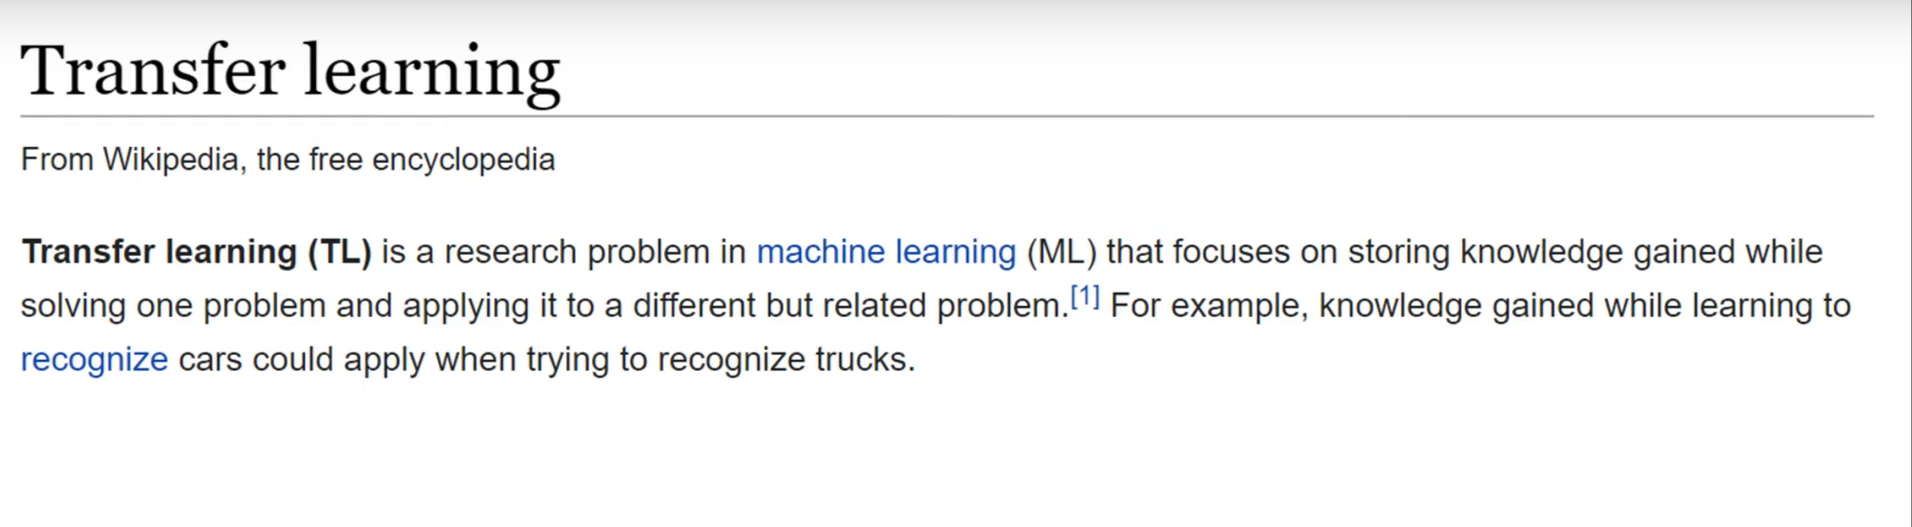

In [ ]:
import cv2
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import PIL
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import PIL.Image as Image


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/17_data_augmentation/'

cnn_flower_image_classification_data_augmentations.ipynb  daisy2.JPG


In [ ]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   cache_dir ='.',
                                   untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg'))) # lenght of my dataset
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5402157745_a384f0583d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6867597533_d65d1c39fb_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3465443774_6b0c75a3b1_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5360769702_ec28c53b9e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3052753519_d087aaeacb_n.jpg')]

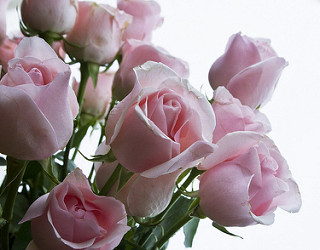

In [ ]:
PIL.Image.open(str(roses[3]))

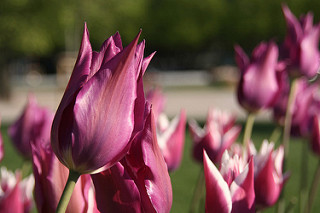

In [ ]:
tulips = list(data_dir.glob('tulips/*.jpg'))
tulips[:5]
PIL.Image.open(str(tulips[3]))

In [ ]:
flowers_image_dict ={
    'roses':list(data_dir.glob('roses/*.jpg')),
    'tulips':list(data_dir.glob('tulips/*.jpg')),
    'dandelion':list(data_dir.glob('dandelion/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg'))
}

In [ ]:
flowers_image_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/18622672908_eab6dc9140_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2828733818_1c1ed0089d_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3456403987_5bd5fa6ece_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/6864242336_0d12713fe5_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/7133935763_82b17c8e1b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/6480809771_b1e14c5cc2_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/134409839_71069a95d1_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/3695826945_9f374e8a00_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2812442552_3eed5fb9f2_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/8446495985_f72d851482.jpg'),
 PosixPath('datasets/flower_photos/daisy/12193032636_b50ae7db35_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/19544831049_0d738d4872_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2509545845_99e79cb8a2_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/391364011_5beaaa1ae2_m.

In [ ]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [ ]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[16,  4,  2],
        [16,  4,  2],
        [17,  5,  3],
        ...,
        [ 7,  2,  3],
        [ 0,  0,  0],
        [ 0,  1,  0]],

       [[16,  4,  2],
        [16,  4,  2],
        [16,  4,  2],
        ...,
        [ 4,  2,  2],
        [ 0,  0,  0],
        [ 0, 13, 11]],

       [[19,  7,  5],
        [18,  6,  4],
        [18,  6,  4],
        ...,
        [ 3,  3,  3],
        [ 1,  6,  5],
        [25, 48, 44]]], dtype=uint8)

In [ ]:
img.shape

(222, 320, 3)

# ***Just trying to understand about the transfer learning concepts using a gold fish example***

In [ ]:
# importing the googles mobile net v2 classification model
IMAGE_SHAPE=(224,224)
classifier = tf.keras.Sequential([
                                  hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4', input_shape=IMAGE_SHAPE+(3,))
])

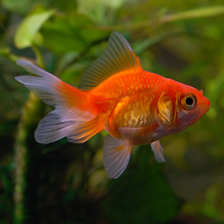

In [ ]:
gold_fish = Image.open('/content/drive/MyDrive/py-master/DeepLearningML/18_transfer_learning/goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish = np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
gold_fish

In [ ]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [ ]:
result = classifier.predict(gold_fish[np.newaxis,...])
result.shape

(1, 1001)

In [ ]:
np.argmax(result)

2

In [ ]:
image_labels =[]
with open('/content/drive/MyDrive/py-master/DeepLearningML/18_transfer_learning/ImageNetLabels.txt','r') as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[np.argmax(result)]

'goldfish'

Till here you completed the checking the Mobilenet model. Now you will start learning about the transfer learning model


In [ ]:
x,y =[],[]

for flower_names, images in flowers_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_image = cv2.resize(img,(IMAGE_SHAPE))
    x.append(resized_image)
    y.append(flowers_labels_dict[flower_names])


In [ ]:
x = np.array(x)
y= np.array(y)

In [ ]:
x.shape

(3670, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, random_state=0)
xtrain_scaled = xtrain/255
xtest_scaled = xtest/255
xtrain_scaled[0]

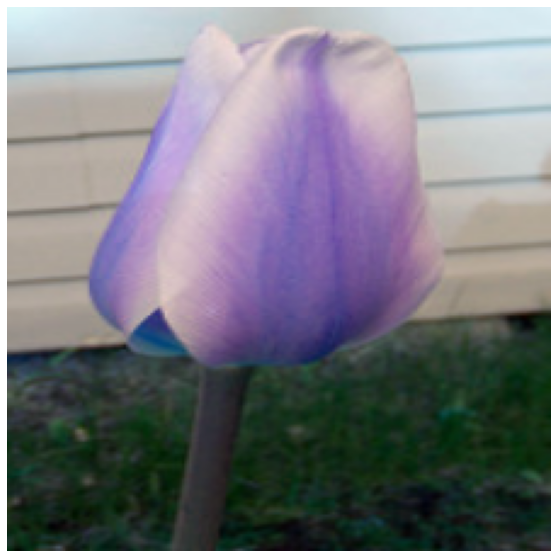

In [ ]:
plt.axis('off')
plt.imshow(x[1000])

In [ ]:
predicted= classifier.predict(np.array([x[0],x[1],x[1000]]))
pred_argmax = np.argmax(predicted, axis=1)
pred_argmax

array([550, 795, 795])

In [ ]:
image_labels[795]  # here you understand you cant use ready made model as it is, as its just trained on 1000 classes, hence we need to do a retraining the model

'shower curtain'

In [ ]:
IMAGE_SHAPE=(224,224)
pre_trained_model_without_top_layer =tf.keras.Sequential([
                                  hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4', input_shape=IMAGE_SHAPE+(3,), trainable=False)
])

In [ ]:
num_of_flowers= 5
model = tf.keras.Sequential([
                             pre_trained_model_without_top_layer,
                             tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])
model.fit(xtrain_scaled,ytrain, epochs=5)
model.evaluate(xtest_scaled,ytest)

Epoch 1/5
86/86 [==============================] - 75s 823ms/step - loss: 0.8375 - acc: 0.6922
Epoch 2/5
86/86 [==============================] - 70s 809ms/step - loss: 0.4165 - acc: 0.8536
Epoch 3/5
86/86 [==============================] - 70s 811ms/step - loss: 0.3265 - acc: 0.8921
Epoch 4/5
86/86 [==============================] - 72s 833ms/step - loss: 0.2729 - acc: 0.9117
Epoch 5/5
29/29 [==============================] - 24s 800ms/step - loss: 0.3480 - acc: 0.8725


[0.3479561507701874, 0.8725489974021912]